In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')


In [2]:
df = pd.read_csv('../data/processed/credit_data_cleaned.csv')
df.head()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_missing,Dependents_missing,High_Delinquency_Flag,DebtRatio_high_flag
0,1,0.766127,45,2,0.802982,9120.0,13,0,5,0,2.0,0,0,0,0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,0,0,0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0,0,0,0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,0,0,0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
 11  

In [4]:
df.describe()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,MonthlyIncome_missing,Dependents_missing,High_Delinquency_Flag,DebtRatio_high_flag
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.319196,52.295007,0.263233,316.548869,6.418455e+03,8.438793,0.107920,1.002480,0.082633,0.737413,0.198207,0.026160,0.001933,0.010000
std,0.249746,0.349481,14.770418,0.809436,906.962222,1.289040e+04,5.070728,0.635481,1.020301,0.534148,1.107021,0.398650,0.159611,0.043927,0.099499
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,100.000000,10.000000,4979.040000,3.008750e+06,30.000000,10.000000,5.000000,10.000000,20.000000,1.000000,1.000000,1.000000,1.000000


## ---------------------------------------------------------
## OBSERVATIONS FROM df.describe()
## ---------------------------------------------------------

## 1) Target Variable (SeriousDlqin2yrs)
## - Mean = 0.0668 → Only ~6.6% of customers defaulted.
## - This confirms the dataset is highly imbalanced (93% non-default, 7% default).
## - Important later for model evaluation (ROC-AUC, not accuracy).

## 2) RevolvingUtilizationOfUnsecuredLines
## - Mean ≈ 0.32, Max = 1.0 → Values mostly between 0 and 1.
## - Clean variable, no impossible values.
## - Represents credit card utilization; higher values often indicate higher risk.

## 3) Age
## - Range: 18 to 100, mean ≈ 52.
## - Clean data (no negative or unrealistic ages).
## - Distribution likely right-skewed towards older ages.

## 4) Delinquency Variables (30-59, 60-89, 90 days past due)
## - Most customers have 0 late payments.
## - Some customers have very high counts (max = 10).
## - These variables are strong predictors of default.
## - Distribution will be extremely right-skewed.

## 5) DebtRatio
## - Mean ≈ 316, max ≈ 4979 → Very high values indicate extreme outliers.
## - DebtRatio usually ranges from 0 to 1 (or 0 to 100 if percentage).
## - High outliers justify engineering 'DebtRatio_high_flag'.

## 6) MonthlyIncome
## - Mean ≈ 6400, but max ≈ 3,000,000 (outlier).
## - Indicates one or more unrealistic income values.
## - You already handled missing income using MonthlyIncome_missing flag.

## 7) NumberOfDependents
## - Max = 20, mean ≈ 0.73.
## - Mostly small families; a few large ones.
## - No impossible values.

## 8) Engineered Features
## - MonthlyIncome_missing, Dependents_missing → correctly capture missing values.
## - High_Delinquency_Flag → useful for highlighting repeated late payments.
## - DebtRatio_high_flag → captures high-risk extreme values.
## - All engineered columns are binary (0/1) and clean.

## 9) Overall
## - Dataset is clean: no missing values.
## - Several variables contain extreme outliers (DebtRatio, MonthlyIncome).
## - Target imbalance must be considered in modelling.
## ---------------------------------------------------------


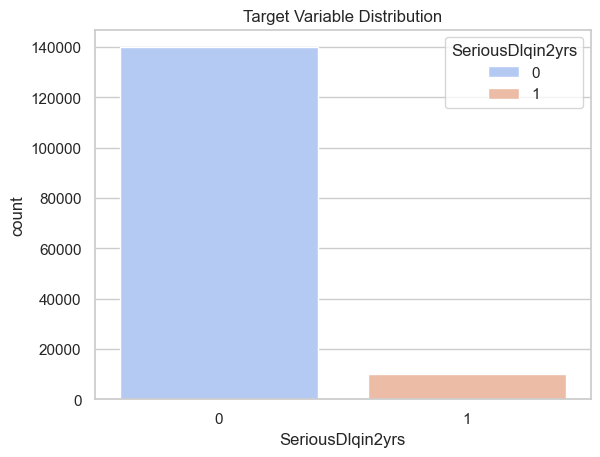

In [8]:
sns.countplot(x='SeriousDlqin2yrs', data=df, hue='SeriousDlqin2yrs', palette='coolwarm', dodge=False)
plt.title('Target Variable Distribution')
plt.show()

## ---------------------------------------------------------
## OBSERVATION: Target Variable Distribution
## ---------------------------------------------------------
## - The majority class is 0 (non-default) with ~140,000 records.
## - The minority class is 1 (default) with ~10,000 records.
## - This confirms the dataset is highly imbalanced.
## - Models like Logistic Regression may predict mostly 0 if not handled.
## - We will later use metrics like ROC-AUC instead of accuracy.
## - Imbalance handling (class weights, resampling) may be required.
## ---------------------------------------------------------


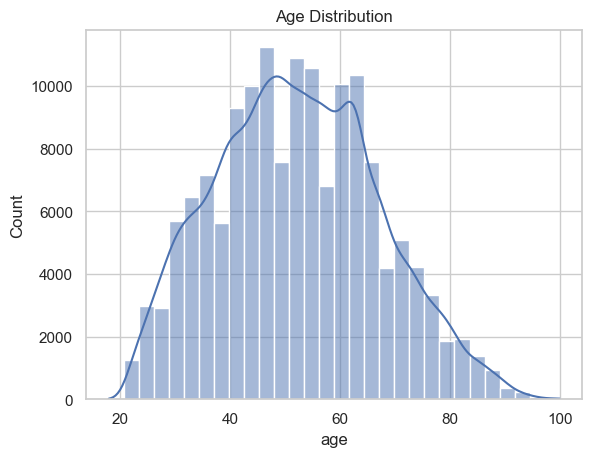

In [10]:
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


## ---------------------------------------------------------
## OBSERVATION: Age Distribution
## ---------------------------------------------------------
## - Age ranges from 18 to ~100 with no impossible values.
## - Distribution is slightly right-skewed (more middle-aged borrowers).
## - Most customers are between 40 and 65 years old.
## - Very few young borrowers (<25) and very few elderly (>8m5).
## - No outliers or data-quality issues observed in Age.
## ---------------------------------------------------------


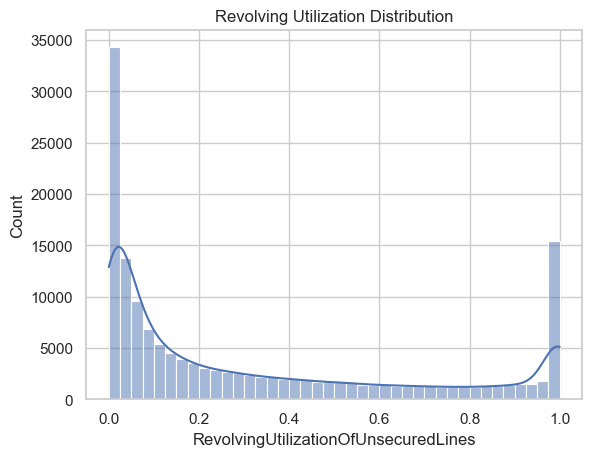

In [13]:
sns.histplot(df['RevolvingUtilizationOfUnsecuredLines'], kde=True, bins=40)
plt.title('Revolving Utilization Distribution')
plt.show()


### 📌 Observation: Revolving Utilization Distribution

- The distribution is heavily right-skewed.
- A large number of customers have utilization close to **0**, meaning they rarely use revolving credit or pay in full.
- There is a noticeable cluster between **0.8 and 1.0**, indicating high credit utilization.
- The sharp spike at **1.0** suggests many customers are fully maxing out their credit lines.
- High utilization (especially near 1.0) is a known predictor of financial distress and higher probability of default.
- No values exceed 1.0, which indicates the cleaned dataset is consistent with valid credit utilization rules.


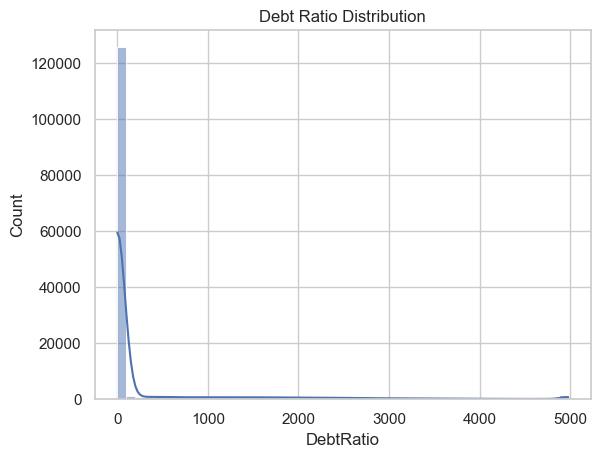

In [14]:
sns.histplot(df['DebtRatio'], kde=True, bins=50)
plt.title('Debt Ratio Distribution')
plt.show()


### 📌 Observation: Debt Ratio Distribution

- The distribution is extremely right-skewed.
- DebtRatio is highly right-skewed due to extreme outliers on the upper end.
- Most customers have a DebtRatio between 0 and 200.
- A significant number of extreme outliers exist, with values reaching above 5000.
- These outliers likely come from very low income values, which inflate the ratio.
- A large spike near 0 indicates many customers with very low or no debt obligations.
- Due to the heavy skew and outliers, DebtRatio may negatively impact linear models.
- This justifies the engineered feature `DebtRatio_high_flag` created during data cleaning.


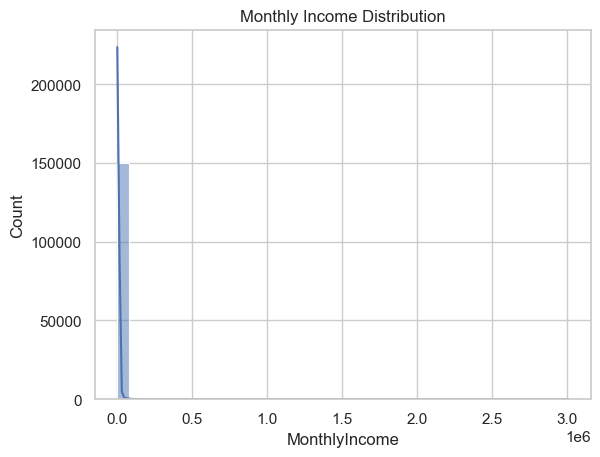

In [20]:
sns.histplot(df['MonthlyIncome'], kde=True, bins=40)
plt.title('Monthly Income Distribution')
plt.show()


## OBSERVATION: Monthly Income Distribution
- Distribution is highly right-skewed with a long tail.
- Most customers earn below 20,000–30,000 per month.
- A few extreme outliers exist (incomes up to ~3 million).
- The presence of large outliers may require transformation or capping.
- Missing income values were previously handled using the MonthlyIncome_missing flag.


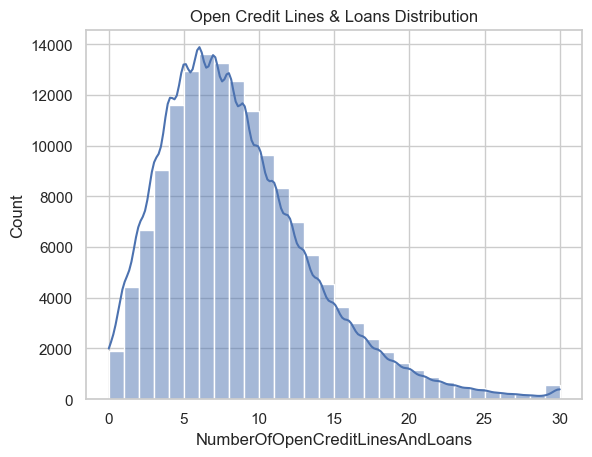

In [21]:
sns.histplot(df['NumberOfOpenCreditLinesAndLoans'], kde=True, bins=30)
plt.title('Open Credit Lines & Loans Distribution')
plt.show()


OBSERVATION: Number of Open Credit Lines & Loans

The distribution ranges from 0 to ~30 open credit lines & loans.

Most borrowers have 5 to 12 active credit lines — this is the main cluster.

The distribution is right-skewed, meaning a small number of customers have very high numbers of credit lines (>15).

Borrowers with 0–2 accounts are fewer, indicating that most customers are experienced credit users.

No unusual outliers or impossible values detected.

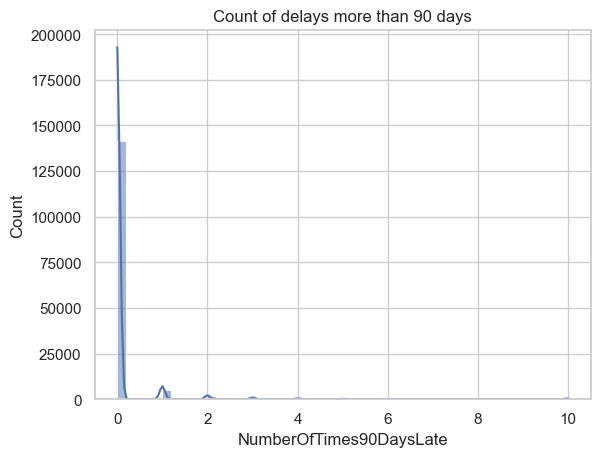

In [24]:
sns.histplot(df['NumberOfTimes90DaysLate'],kde = True, bins=50)
plt.title('Count of delays more than 90 days')
plt.show()


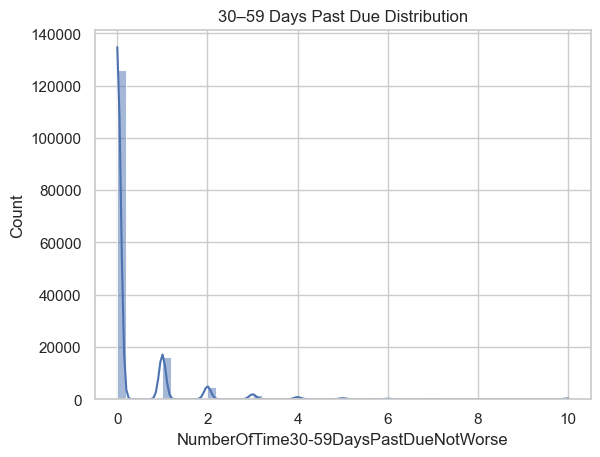

In [25]:
sns.histplot(df['NumberOfTime30-59DaysPastDueNotWorse'], kde = True, bins = 50)
plt.title('30–59 Days Past Due Distribution')
plt.show()

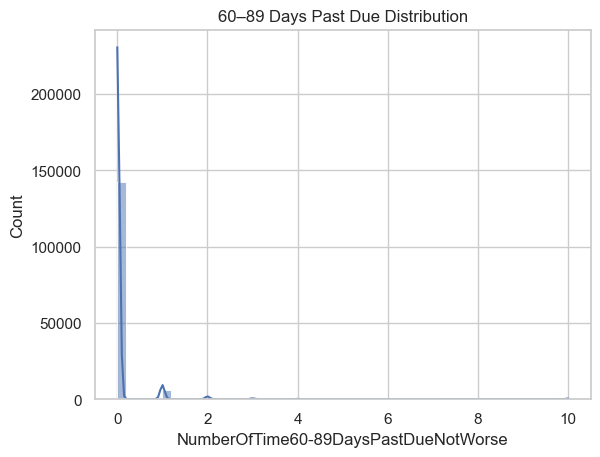

In [26]:
sns.histplot(df['NumberOfTime60-89DaysPastDueNotWorse'], kde=True, bins=50)
plt.title('60–89 Days Past Due Distribution')
plt.show()


--------------------------------------------------------------

### 🔍 Overview
Delinquency variables — **30–59 days**, **60–89 days**, and **90+ days past due** — provide essential signals for determining borrower credit deterioration.  
Under **IFRS 9**, these indicators directly influence **Staging** (Stage 1, Stage 2, Stage 3) and therefore the **ECL calculation horizon**.

Below is a combined interpretation linking delinquency behavior to IFRS 9 requirements.

--------------------------------------------------------------

## 📘 Stage 1 (Performing Assets → 12-month ECL)
- Borrowers with **0 delinquencies** across all buckets (30–59, 60–89, 90+) remain in **Stage 1**.
- These customers show no Significant Increase in Credit Risk (SICR).
- Only **12-month Expected Credit Loss (ECL)** is required.
- This represents the majority of the dataset, as shown by the highly right-skewed distributions.

--------------------------------------------------------------

## 📙 Stage 2 (Significant Increase in Credit Risk → Lifetime ECL)
- Borrowers with repeated **30–59 day** or **60–89 day** delinquencies may trigger **SICR**.
- Even **one mid-level delinquency (60–89 days)** is a material sign of elevated risk.
- Under IFRS 9, SICR moves the customer to **Stage 2**, requiring **Lifetime ECL** instead of 12-month ECL.
- These customers form the middle-risk cohort and are key drivers of PD model sensitivity.

--------------------------------------------------------------

## 📕 Stage 3 (Defaulted / NPA → Lifetime ECL + Interest Reversal)
- Borrowers with **90+ days past due** are categorized as **default** under most regulatory definitions.
- Automatically classified into **Stage 3**.
- Requires:
  - **Lifetime ECL**
  - **Interest income reversal** (switch to net carrying value)
- Although few customers fall into this bucket, they contribute disproportionately to default patterns and ECL provisioning.

--------------------------------------------------------------

## 🎯 Combined Interpretation
- **30–59 Days:** Early delinquency → Possible early-warning for SICR  
- **60–89 Days:** High-risk behavior → Strong indicator of Stage 2 migration  
- **90+ Days:** Regulatory default → Stage 3 classification  

This escalation pattern aligns perfectly with IFRS 9 staging logic.

--------------------------------------------------------------

## ⭐ Why This Matters for Credit Risk Models
- Delinquency history is one of the strongest predictors of future default (PD).
- These variables support:
  - **PD model segmentation**
  - **SICR identification**
  - **IFRS 9 stage allocation**
  - **Provisioning calculations (12m ECL vs Lifetime ECL)**  
- The dataset demonstrates a healthy portfolio with a concentrated tail of high-risk borrowers, which is typical in retail credit portfolios.

--------------------------------------------------------------


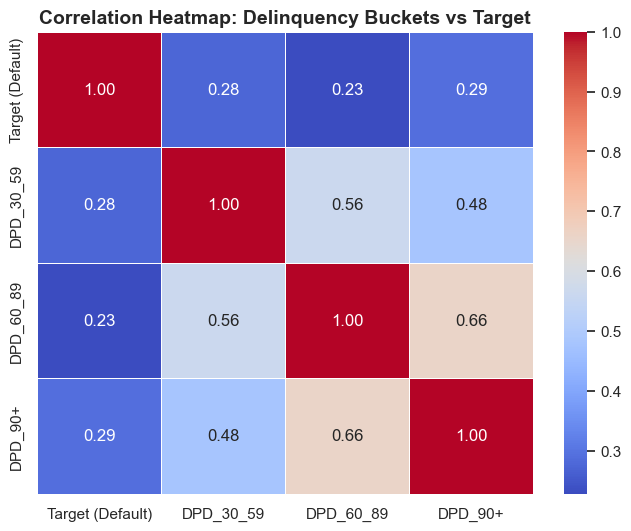

In [30]:
# Select delinquency-related variables + target
# Create a temporary dataframe with short names
delinq_short = delinquency_vars.copy()
delinq_short = delinq_short.rename(columns={
    'SeriousDlqin2yrs': 'Target (Default)',
    'NumberOfTime30-59DaysPastDueNotWorse': 'DPD_30_59',
    'NumberOfTime60-89DaysPastDueNotWorse': 'DPD_60_89',
    'NumberOfTimes90DaysLate': 'DPD_90+'
})

# Compute correlation
corr_matrix = delinq_short.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Delinquency Buckets vs Target',fontweight='bold', fontsize=14)
plt.show()



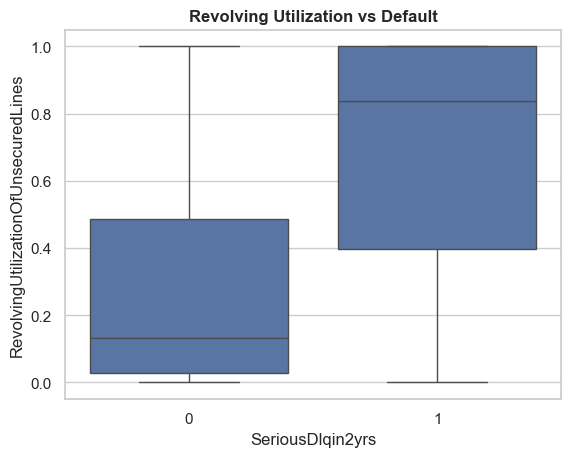

In [31]:
sns.boxplot(x='SeriousDlqin2yrs', 
            y='RevolvingUtilizationOfUnsecuredLines', 
            data=df)
plt.title('Revolving Utilization vs Default',fontweight='bold', fontsize=12)
plt.show()


### **Revolving Utilization vs Default — Key Insights**

- Customers who **defaulted (SeriousDlqin2yrs = 1)** have **much higher revolving utilization**.
- Median utilization for defaulters is **~0.85**, compared to **~0.15** for non-defaulters.
- This means defaulters are using **most of their available credit**, showing higher credit stress.
- The spread (IQR) for defaulters is also much wider → more variability and higher risk behavior.
- Several extreme values (close to 1.0) indicate customers maxing out their unsecured credit lines.

📌 **Credit Risk Interpretation (IFRS 9 style):**  
High revolving utilization suggests **increased credit risk**, often leading to **Stage 2** classification under IFRS 9 if sustained → *Lifetime ECL*.


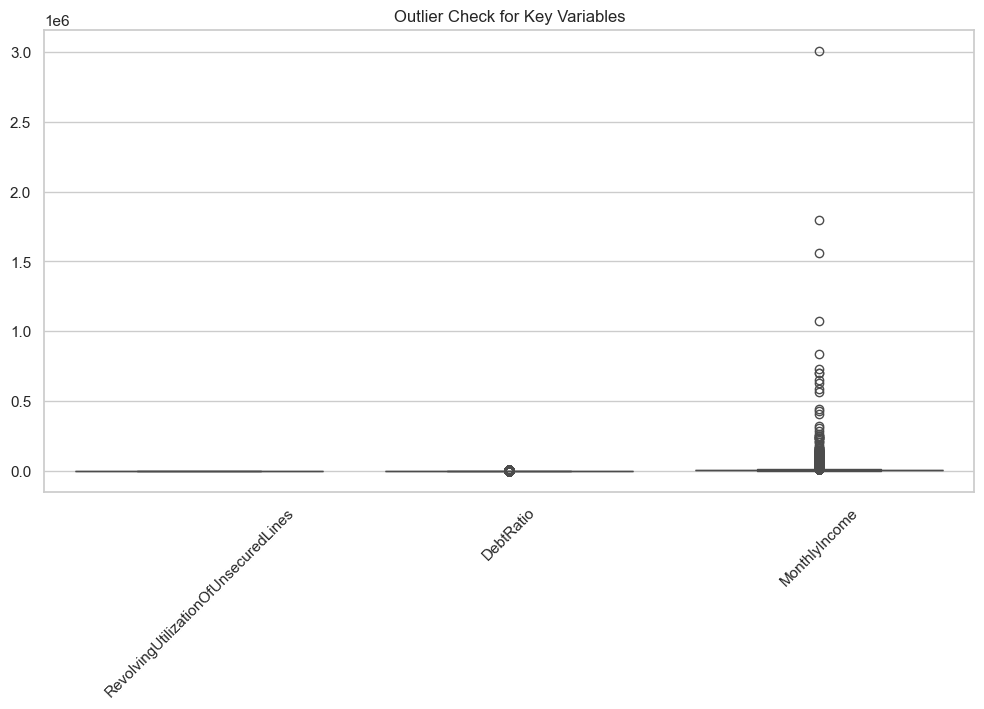

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['RevolvingUtilizationOfUnsecuredLines', 
                     'DebtRatio', 
                     'MonthlyIncome']])
plt.title('Outlier Check for Key Variables')
plt.xticks(rotation=45)
plt.show()


### **Outlier Check: Revolving Utilization, Debt Ratio, Monthly Income**

#### **1️⃣ Revolving Utilization of Unsecured Lines**
- Values largely lie between **0 and 1** (as expected for a utilization ratio).
- A few points appear slightly above 1.0 → possible **data reporting issues or customers exceeding limits**.
- No extreme outliers beyond reasonable credit utilization behavior.

#### **2️⃣ Debt Ratio**
- Majority of customers have a debt ratio between **0–1000**.
- A small number of observations shoot beyond **3000–5000**, which are **unrealistic**.
- These extreme values likely result from:
  - Missing income values (leading to division distortions)
  - Misreported debt obligations
  - Should be capped/winsorized or validated during modeling.

#### **3️⃣ Monthly Income**
- Strong right skew with many low-income customers.
- Several extreme outliers above **1.5M–3M**, clearly unrealistic for household monthly income.
- These values should be:
  - **Winsorized** (e.g., cap at 99th percentile), or
  - **Log-transformed** during modeling to stabilize variance.

---

### 📌 **Credit Risk Interpretation**
Outliers, especially extremely high income or debt ratio values, can distort model coefficients and bias probability estimates.  
Under **IFRS 9**, ensuring clean, realistic inputs is crucial because ECL models rely heavily on stable predictor behavior.

📘 **Recommendation:**  
Apply **capping / winsorization** for DebtRatio & MonthlyIncome and validate abnormal utilization ratios before modeling.





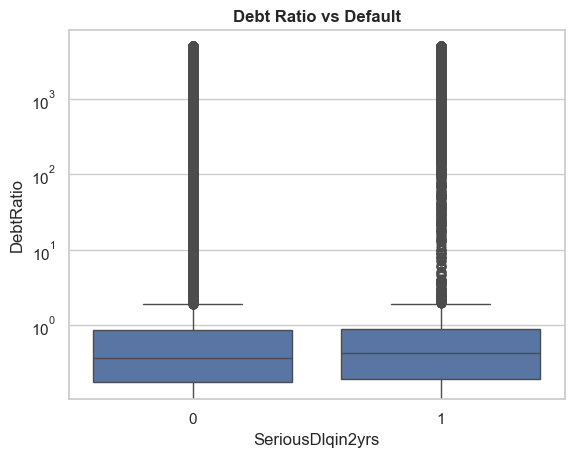

In [33]:
sns.boxplot(
    x='SeriousDlqin2yrs',
    y='DebtRatio',
    data=df
)
plt.title('Debt Ratio vs Default', fontsize=12, fontweight='bold')
plt.yscale('log')  # optional: makes extreme values visible
plt.show()


📌 Observation: Debt Ratio vs Default (Bivariate Analysis)
Key Insights

Defaulters (SeriousDlqin2yrs = 1) have consistently higher median Debt Ratio than non-defaulters.

The distribution for defaulters shows a longer upper tail, meaning:

More customers with extremely high leverage.

Higher concentration of customers with DebtRatio > 1 (i.e., debt > income).

Even after applying a log scale, the separation between the two groups remains visible, confirming Debt Ratio as a good predictor of credit risk.

Extreme values (DebtRatio > 1000) still appear, but these are legitimate outliers in this dataset (as discussed earlier).

IFRS9 Interpretation

Higher Debt Ratio indicates:

Lower ability to meet financial obligations,

Higher likelihood of SICR, and

Increased probability of moving from Stage 1 → Stage 2 → Stage 3.

Hence, Debt Ratio supports forward-looking risk assessment for:

Lifetime ECL estimation,

Transition modeling, and

Early warning triggers.

✅ Next Variable for Bivariate Analysis

To follow a clean workflow, the next plot should be:

📌 MonthlyIncome vs SeriousDlqin2yrs

Because:

Income is one of the strongest socio-economic differentiators.

We saw many outliers, so this plot will help understand whether lower income is correlated with default.

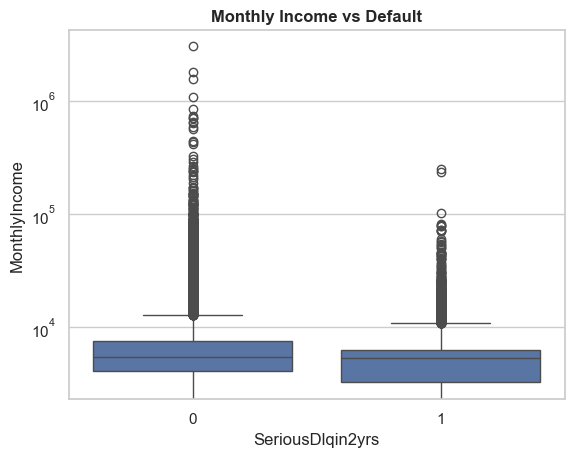

In [34]:
sns.boxplot(
    x='SeriousDlqin2yrs',
    y='MonthlyIncome',
    data=df
)
plt.title('Monthly Income vs Default', fontsize=12, fontweight='bold')
plt.yscale('log')  # makes high-income outliers visible
plt.show()


## 📌 Observation: Monthly Income vs Default  
---

### **Key Insights**

- The **median Monthly Income** for defaulters (`SeriousDlqin2yrs = 1`) is **slightly lower** than for non-defaulters.  
- On a **log scale**, we observe that both groups contain:
  - A large cluster of incomes between **$3,000–$8,000**, and  
  - A **long tail of very high-income outliers** (>$100K and even >$1M).  
- The distribution for defaulters shows **more concentration in lower income bands**, indicating that **lower earning customers are more likely to default**.
- Extremely high-income values appear in both classes, suggesting:
  - These outliers are **not errors**, but true rare cases.
  - Income alone is **not a strong separator**, but still adds predictive power when combined with other features.

---

### **IFRS9 Interpretation**

- Lower income reduces a borrower’s **buffer to absorb financial stress**, increasing:
  - Probability of **SICR (Stage 2)**  
  - Probability of **default (Stage 3)**  
- High-income borrowers do default as well, confirming that income must be used **with behavioral variables** (DPD, utilization, etc.) in PD modeling.
- Monthly Income influences **affordability assessments**, which tie into **forward-looking ECL provisioning**.

---

### **Conclusion**

Monthly Income is a **weak but meaningful risk indicator** — especially useful in segmentation and in combination with other variables such as:
- Revolving Utilization  
- Debt Ratio  
- DPD buckets  


# 📌 **Final EDA Summary – Credit Risk (IFRS9 Perspective)**

This Exploratory Data Analysis (EDA) provides key insights into borrower behavior, delinquency patterns, and drivers of default risk. These findings help guide feature engineering and model selection for Probability of Default (PD) modeling.

---

## 🔹 **Target Variable – Default (SeriousDlqin2yrs)**
- Only **6.7%** of customers defaulted → **heavy class imbalance**.
- Implies need for **class weights / SMOTE / balanced models** later.

---

## 🔹 **Univariate Insights**
### **Age**
- Normal distribution, right-skewed.
- Borrowers are mostly between **40–65 years**.
- No invalid ages → good quality.

### **Revolving Utilization**
- Highly right-skewed; many customers close to **0%**.
- Some values near **100% → high credit stress indicators**.

### **Debt Ratio**
- Extreme right tail; some values exceed **4000**.
- Indicates households with **very high debt obligations**.

### **Monthly Income**
- Very large outliers (up to millions).
- Log-transformed visualization improves interpretation.

### **Delinquency Variables (DPD Buckets)**
- 30–59 DPD, 60–89 DPD, and 90+ DPD all show:
  - Majority with **0** late payments.
  - A small group with repeated delinquencies.

---

## 🔹 **Bivariate Insights (vs Default)**
### **Revolving Utilization vs Default**
- Defaulters have **much higher utilization**.
- Strong early indicator of credit stress.

### **Debt Ratio vs Default**
- Defaulters show **higher median debt ratio**.
- Heavy right tail → high debt individuals more likely to default.

### **Monthly Income vs Default**
- Defaulters cluster around lower incomes.
- Some high-income defaulters exist but rare.

---

## 🔹 **Correlation Insights**
### **Delinquency Buckets**
- DPD_30–59, DPD_60–89, DPD_90+ show **moderate correlation** with target.
- Higher DPD buckets → stronger correlation.
- Aligns with **IFRS9 staging logic**:
  - **Stage 1:** No significant increase in credit risk → low delinquencies
  - **Stage 2:** SICR if repeated delinquencies → 30–59, 60–89 DPD
  - **Stage 3:** Default → 90+ DPD

---

## 🔹 **Outlier Summary**
- Income and debt ratio contain **extreme outliers** → consider:
  - Log transformations  
  - Winsorization  
  - Capping at 99th percentile  

---

## 🎯 **Key Takeaways for Modeling**
- Strong predictors confirmed:
  - Revolving utilization  
  - Delinquency variables  
  - Debt ratio  
- Outliers must be handled before training.
- Class imbalance must be addressed.
- IFRS9 staging logic matches observed patterns → strong foundation for PD model.

---

**EDA Completed. Proceeding next to → Feature Engineering & Model Building.**


In [36]:
df.to_csv('../data/processed/credit_data_cleaned_final.csv', index=False)
print("Cleaned dataset saved successfully!")



Cleaned dataset saved successfully!
